In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Species'] = encoder.fit_transform(df['Species'])

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [ ]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

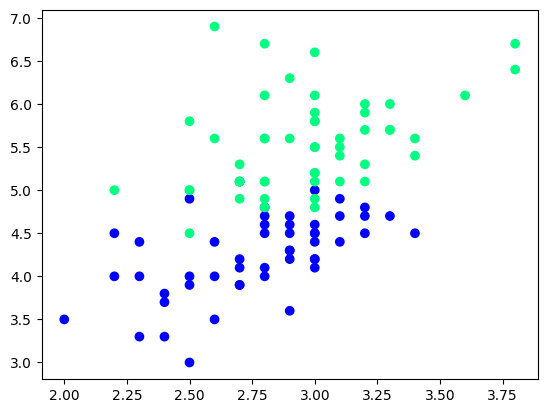

In [ ]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [ ]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
56,3.3,4.7,1
93,2.3,3.3,1
106,2.5,4.5,2
104,3.0,5.8,2
100,3.3,6.0,2
74,2.9,4.3,1
51,3.2,4.5,1
65,3.1,4.4,1
109,3.6,6.1,2


In [ ]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
df_train

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
78,2.9,4.5,1
108,2.5,5.8,2
62,2.2,4.0,1
91,3.0,4.6,1
109,3.6,6.1,2
67,2.7,4.1,1
111,2.7,5.3,2
85,3.4,4.5,1
90,2.6,4.4,1


In [ ]:
df_val

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
126,2.8,4.8,2
70,3.2,4.8,1
124,3.3,5.7,2
129,3.0,5.8,2


In [ ]:
df_test

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
99,2.8,4.1,1
138,3.0,4.8,2
69,2.5,3.9,1
64,2.9,3.6,1


In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [ ]:
y_test

array([2, 2, 1, 2, 2])

## Case 1 - Bagging

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
62,2.2,4.0,1
108,2.5,5.8,2
111,2.7,5.3,2
67,2.7,4.1,1
109,3.6,6.1,2
62,2.2,4.0,1
108,2.5,5.8,2
91,3.0,4.6,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
dt_bag1 = DecisionTreeClassifier()

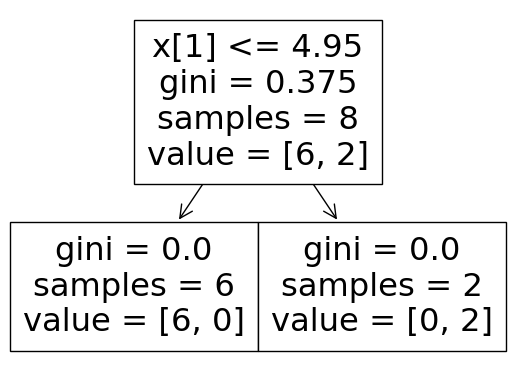

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


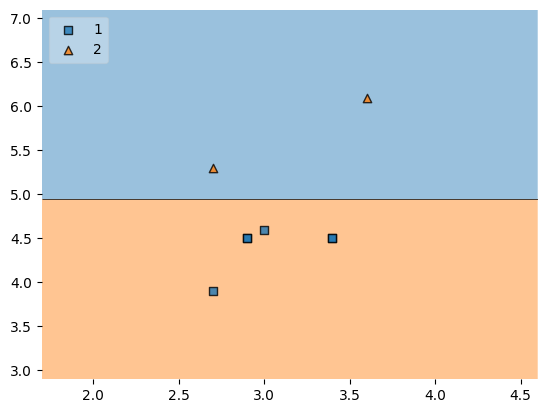

In [ ]:
evaluate(dt_bag1,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
62,2.2,4.0,1
111,2.7,5.3,2
109,3.6,6.1,2
78,2.9,4.5,1
109,3.6,6.1,2
91,3.0,4.6,1
59,2.7,3.9,1


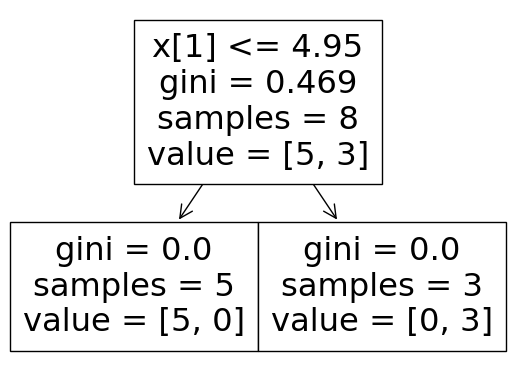

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


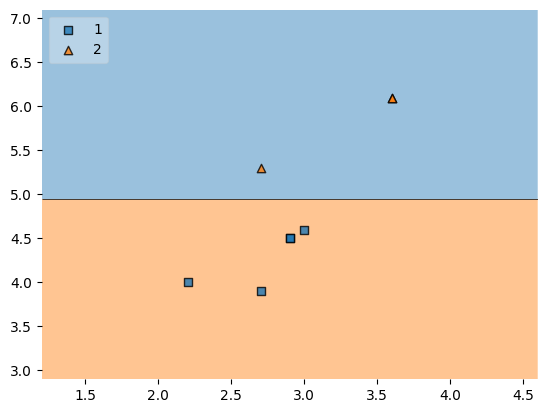

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
108,2.5,5.8,2
62,2.2,4.0,1
108,2.5,5.8,2
85,3.4,4.5,1
67,2.7,4.1,1
91,3.0,4.6,1
78,2.9,4.5,1
109,3.6,6.1,2


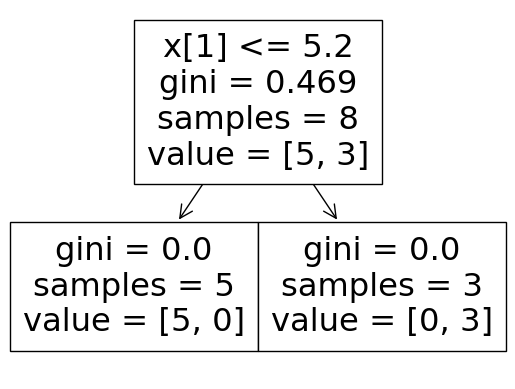

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


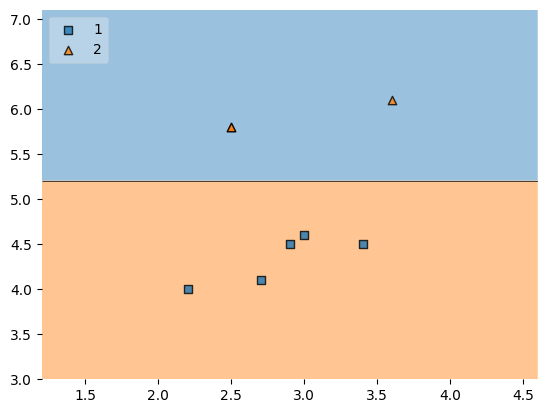

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

## Predict

In [ ]:
df_test

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
99,2.8,4.1,1
138,3.0,4.8,2
69,2.5,3.9,1
64,2.9,3.6,1


In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

In [ ]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
59,2.7,3.9,1
78,2.9,4.5,1
108,2.5,5.8,2
62,2.2,4.0,1
91,3.0,4.6,1
109,3.6,6.1,2
67,2.7,4.1,1
111,2.7,5.3,2
85,3.4,4.5,1
90,2.6,4.4,1


In [ ]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
67,2.7,4.1,1
59,2.7,3.9,1
85,3.4,4.5,1
90,2.6,4.4,1
62,2.2,4.0,1
108,2.5,5.8,2
78,2.9,4.5,1
109,3.6,6.1,2


## Random Subspaces

In [ ]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [ ]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
138,139,6.0,3.0,4.8,1.8,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica


In [ ]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,Id
78,2.9,79
62,2.2,63
121,2.8,122
64,2.9,65
88,3.0,89
18,3.8,19
138,3.0,139
38,3.0,39
73,2.8,74
113,2.5,114


## Random Patches

In [ ]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
138,139,6.0,3.0,4.8,1.8,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica


In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,SepalLengthCm
38,Iris-setosa,4.4
78,Iris-versicolor,6.0
88,Iris-versicolor,5.6
73,Iris-versicolor,6.1
138,Iris-virginica,6.0
38,Iris-setosa,4.4
138,Iris-virginica,6.0
73,Iris-versicolor,6.1
